# Anomaly Detection

Датасет взят с https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter("ignore", UserWarning)

In [66]:
data = pd.read_csv('creditcard.csv')
data.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0


In [67]:
data.shape

(17918, 31)

In [68]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,...,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000
mean,13905.276259,-0.244970,0.258166,0.777804,0.291614,-0.146329,0.099878,-0.150970,0.012969,0.734707,...,-0.052197,-0.146256,-0.038504,0.014510,0.119974,0.036454,0.014558,0.007047,67.504000,0.004521
std,9867.916251,1.893161,1.508296,1.766872,1.479519,1.423917,1.327756,1.342027,1.318460,1.273597,...,0.826158,0.634077,0.526168,0.588938,0.438850,0.537046,0.397673,0.248679,189.184677,0.067087
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.687773,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3781.250000,-0.959806,-0.305367,0.338327,-0.629972,-0.729796,-0.651820,-0.599770,-0.175261,-0.102798,...,-0.262581,-0.556175,-0.173509,-0.330602,-0.140146,-0.345451,-0.071486,-0.011786,5.490000,0.000000
50%,12347.500000,-0.306803,0.235061,0.924255,0.230058,-0.192681,-0.169764,-0.076457,0.020846,0.726588,...,-0.119493,-0.118803,-0.046656,0.063623,0.158356,-0.030200,0.003094,0.018529,15.950000,0.000000
75%,23775.000000,1.164015,0.876538,1.557391,1.155770,0.347812,0.493661,0.447398,0.272076,1.480254,...,0.041561,0.250886,0.072758,0.398391,0.397765,0.342446,0.098968,0.077345,56.670000,0.000000
max,29031.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

# EDA

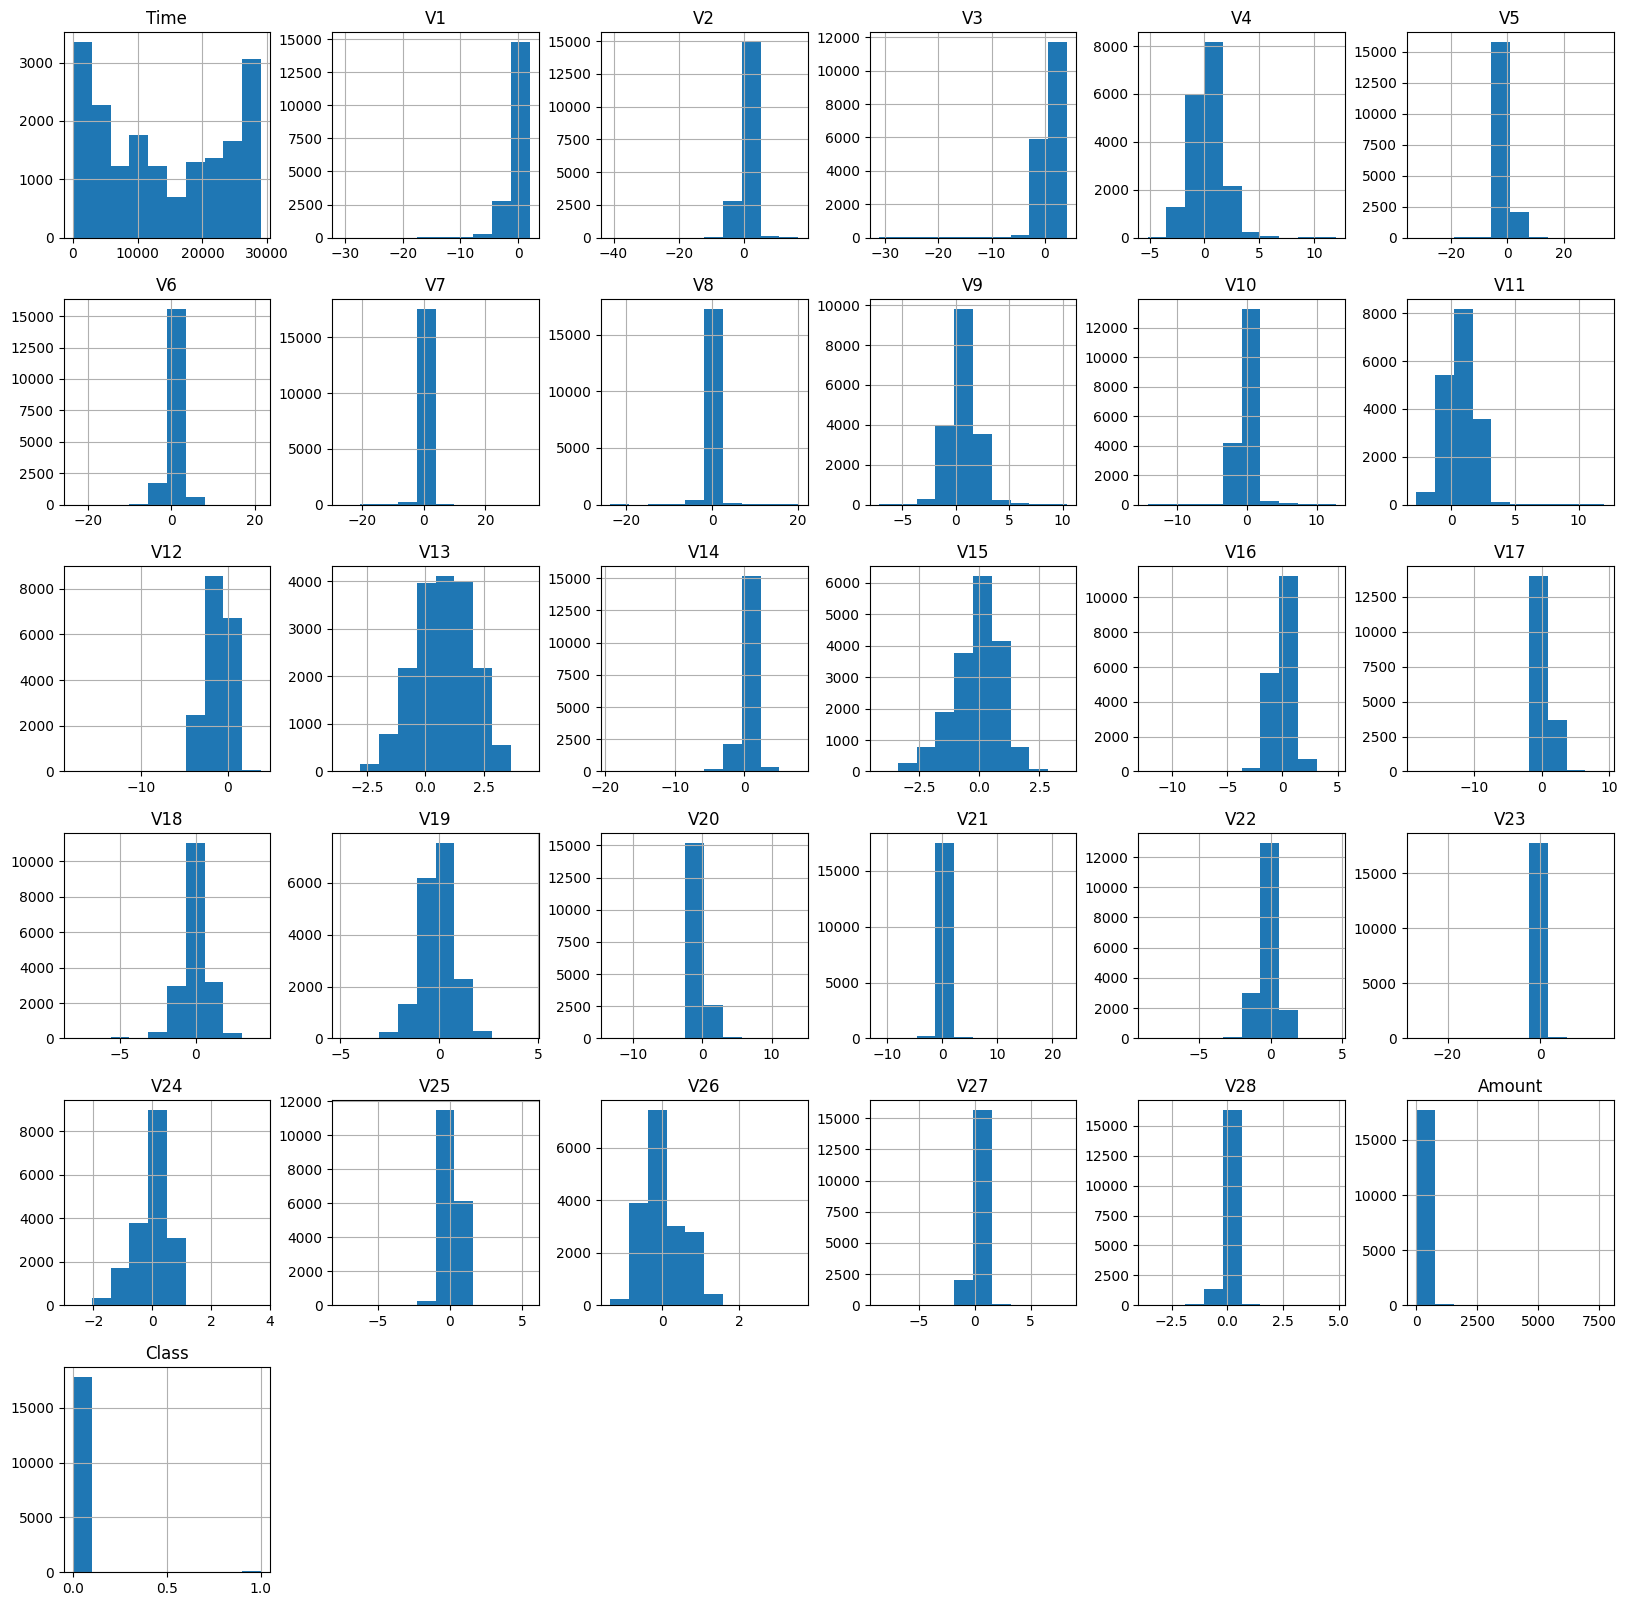

In [70]:
data.hist(figsize=(20, 20));

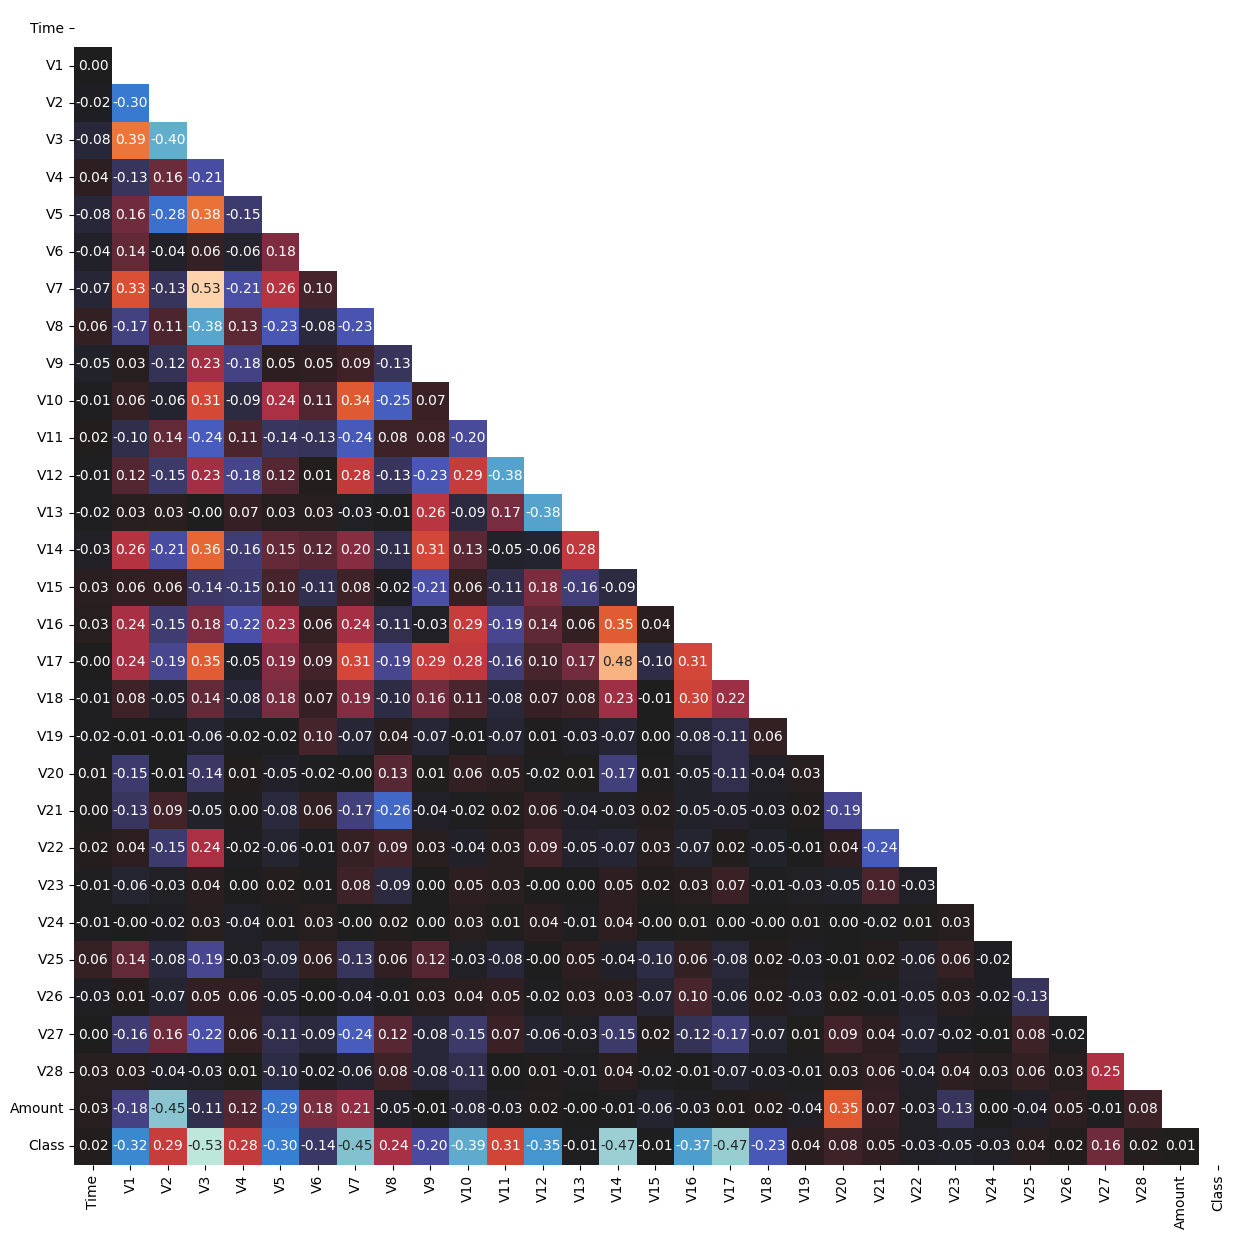

In [71]:
plt.figure(figsize=(15, 15))
corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))
sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

In [72]:
high_corr = [
    column for column in lower.columns if any((lower[column] > 0.5)|(lower[column] < -0.5))
]
high_corr

['V3']

In [73]:
other_features = [col for col in data.columns if col not in high_corr and col!='quality']

Удалим одну строчку с пропущенными значениями

In [74]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [75]:
data.dropna(axis=0, inplace=True)

**Подсчитаем по переменной Class процент аномалий, и будем использовать его как "экспертную оценку" загрязненности нашего датасета!**

In [76]:
data['Class'].value_counts()

0.0    17836
1.0       81
Name: Class, dtype: int64

In [77]:
fraudulent_transactions = data['Class'].value_counts()[1]
print(f'All frauds transactions is {fraudulent_transactions} pcs')

All frauds transactions is 81 pcs


In [78]:
print('No Frauds', round(data['Class'].value_counts()[0] / len(data) * 100, 2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1] / len(data) * 100, 2), '% of the dataset')

No Frauds 99.55 % of the dataset
Frauds 0.45 % of the dataset


In [79]:
y_true = data['Class']
y_true

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
17912    0.0
17913    0.0
17914    0.0
17915    0.0
17916    0.0
Name: Class, Length: 17917, dtype: float64

**Метод 3-сигм**

In [80]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [81]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False] * len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100 * sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers


In [82]:
def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100 * sum(outliers)/len(outliers)))  

In [83]:
data_features = data.iloc[:, :-1]

In [84]:
comparison_table, std_outliers = get_column_outliers(data_features, columns=None)
anomalies_report(std_outliers)

Total number of outliers: 2010
Percentage of outliers:   11.22%


Если посмотреть на признаки, то можно заметить, что почти все они имеют нормальное распределение с матожиданием 0 и дисперсией около 1. Почти все признаки также на коррелируются друг с другом, что не удивительно, так как они получены в результате PCA и являются первыми 28 главными компонентами, а как мы знаем каждый признак несёт какую-то новую информацию. Названия признаков нам не известны из-за типичности сферы данных (защита информации о пользователях кредитных карт. Классы не сбалансированны, так как 237262 транзакции относятся к нулевому классу и лишь 432 транзакции "подозрительные". Всего по датасету 12.99% выбросов (по методу 3-х сигм)

In [85]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V20,1.872410,-1.800573,352.0,1.964615
V28,0.753085,-0.738991,331.0,1.847407
V27,1.207578,-1.178462,309.0,1.724619
V2,4.783187,-4.266835,308.0,1.719038
V10,3.481759,-3.978336,289.0,1.612993
Amount,635.058030,-500.050029,274.0,1.529274
V8,3.968349,-3.942410,263.0,1.467880
V6,4.083146,-3.883391,258.0,1.439973
V21,2.426278,-2.530671,229.0,1.278116
V14,4.691851,-3.432954,228.0,1.272534


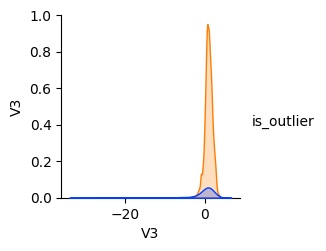

In [86]:
labeled_data = data_features[high_corr].copy()
labeled_data['is_outlier'] = std_outliers

sns.pairplot(data=labeled_data, vars = high_corr,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

**Box plot**

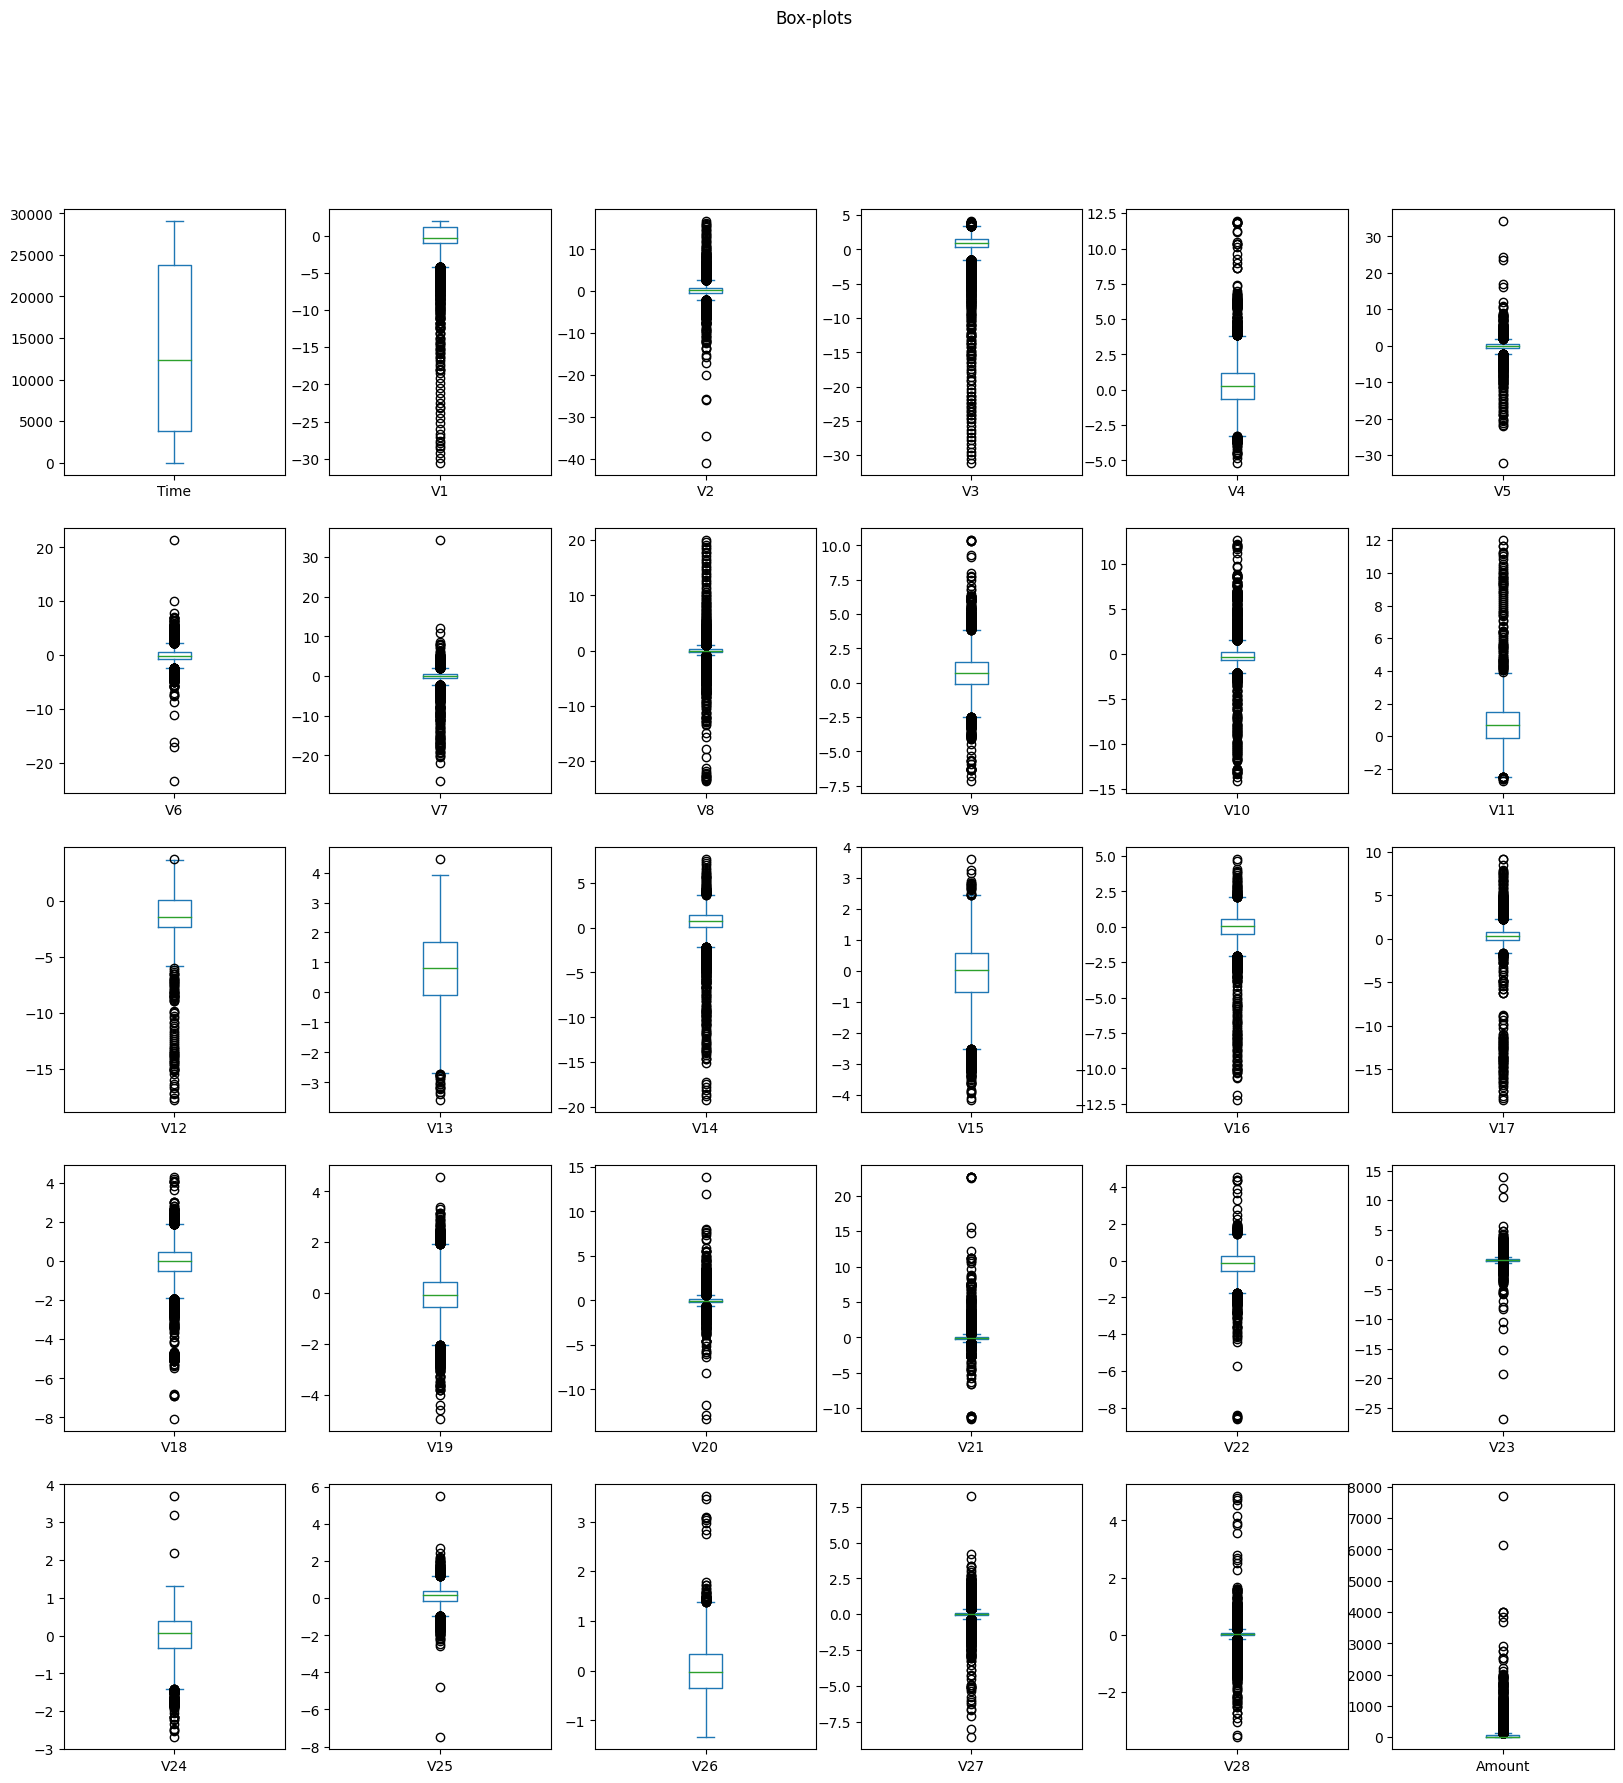

In [87]:
fig, axes = plt.subplots(5, 6, figsize=(20, 20))
fig.suptitle('Box-plots')

row = 0
col = 0

for ax, feature in enumerate(data_features):
    data_features[feature].plot.box(ax=axes[row, col])
    col += 1
    if col > 5:
        row += 1
        col = 0

In [88]:
def outlier_iqr(data, col, threshold=1.5):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    
    return anomalies, up_bound, low_bound

In [89]:
comparison_table, iqr_outliers = get_column_outliers(data_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 3699
Percentage of outliers:   20.65%


In [90]:
comparison_table

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V28,0.344738,-0.279179,1458.0,8.137523
Amount,210.210000,-148.050000,1203.0,6.714294
V27,0.610330,-0.582849,952.0,5.313390
V8,1.614087,-1.517272,916.0,5.112463
V20,1.072043,-1.080341,847.0,4.727354
V21,0.953985,-1.175005,701.0,3.912485
V23,0.811558,-0.912309,586.0,3.270637
V2,4.422370,-3.851196,372.0,2.076240
V10,2.921490,-3.427193,335.0,1.869733
V6,3.930105,-4.088263,302.0,1.685550


# Clustering

**Distance-based**

In [91]:
class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        

    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

Обязательно выполним масштабирование данных с помощью RobustScaler

In [92]:
scaler = RobustScaler()
scaled_data = pd.DataFrame(data=scaler.fit_transform(data_features), 
                          columns=data_features.columns)

Уменьшим размерность для визуализации данных

CPU times: user 4min 44s, sys: 516 ms, total: 4min 44s
Wall time: 2min 45s


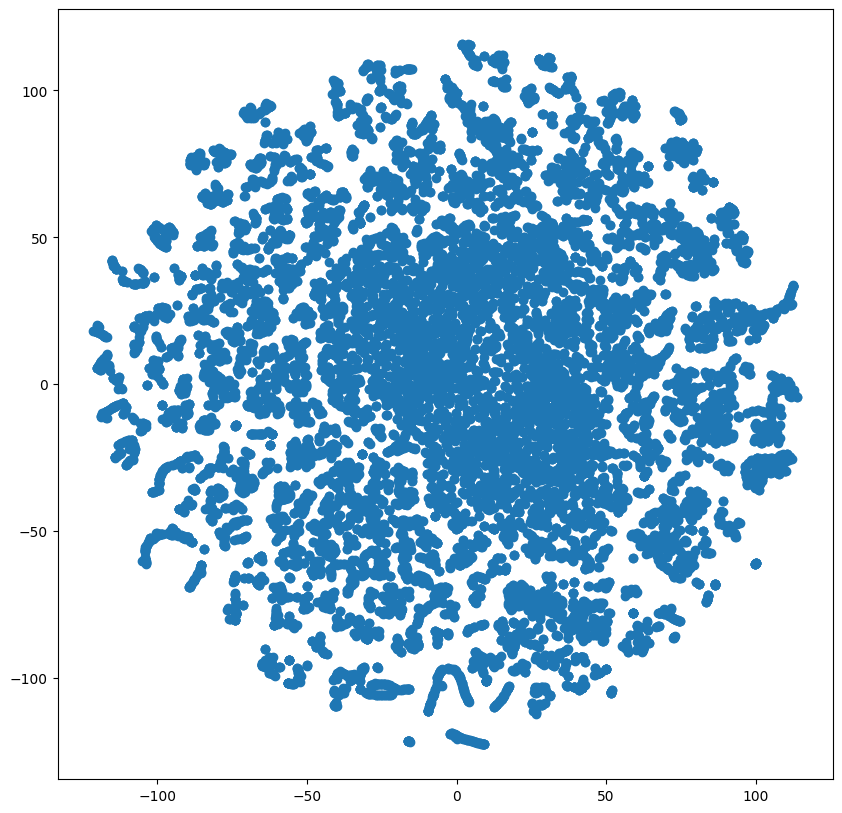

In [93]:
%%time
# tsne = TSNE(perplexity=50, n_jobs=-1)
tsne = TSNE(n_components=2, perplexity=10, n_jobs=-1, random_state=10)
tsne_transformed = tsne.fit_transform(scaled_data)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1]);

Посмотрим на результаты в случае использования евклидовой нормы

In [94]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=95)
euclidian_model.fit(scaled_data)
euclidian_outliers = euclidian_model.predict(scaled_data)
anomalies_report(euclidian_outliers)

Total number of outliers: 896
Percentage of outliers:   5.00%


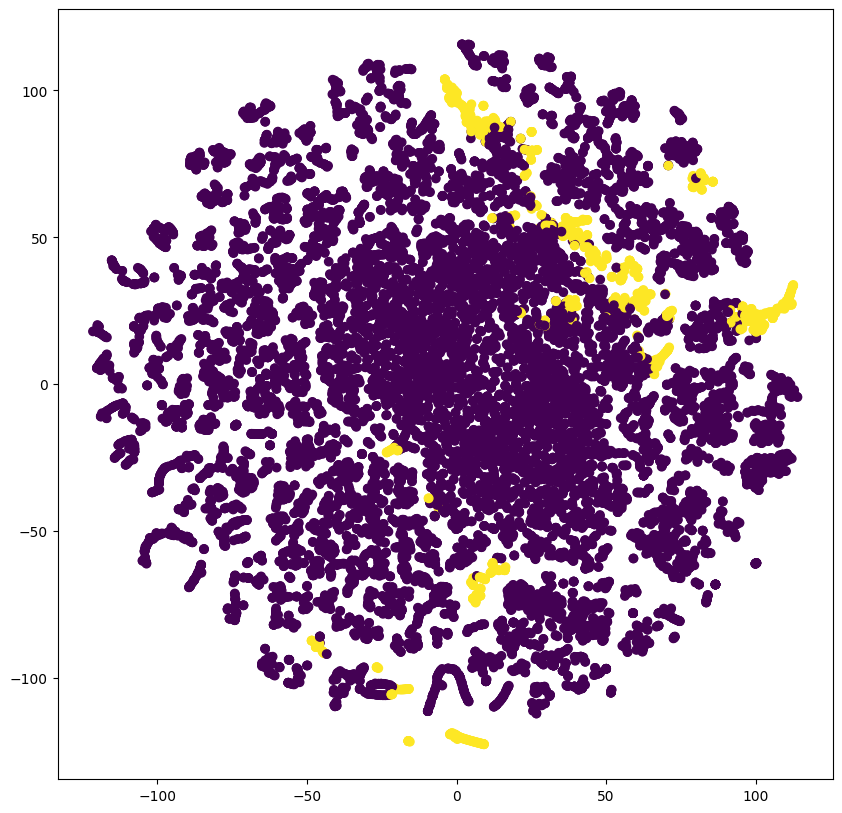

In [95]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=euclidian_outliers);

Посмотрим на результаты в случае использования манхетонской нормы

In [96]:
citiblock_model = DistanceOutliers(metric='cityblock', percentile=95)
citiblock_model.fit(scaled_data)
cityblock_outliers = citiblock_model.predict(scaled_data)
anomalies_report(cityblock_outliers)

labeled_data = data_features.copy()
labeled_data['is_outlier'] = cityblock_outliers

Total number of outliers: 896
Percentage of outliers:   5.00%


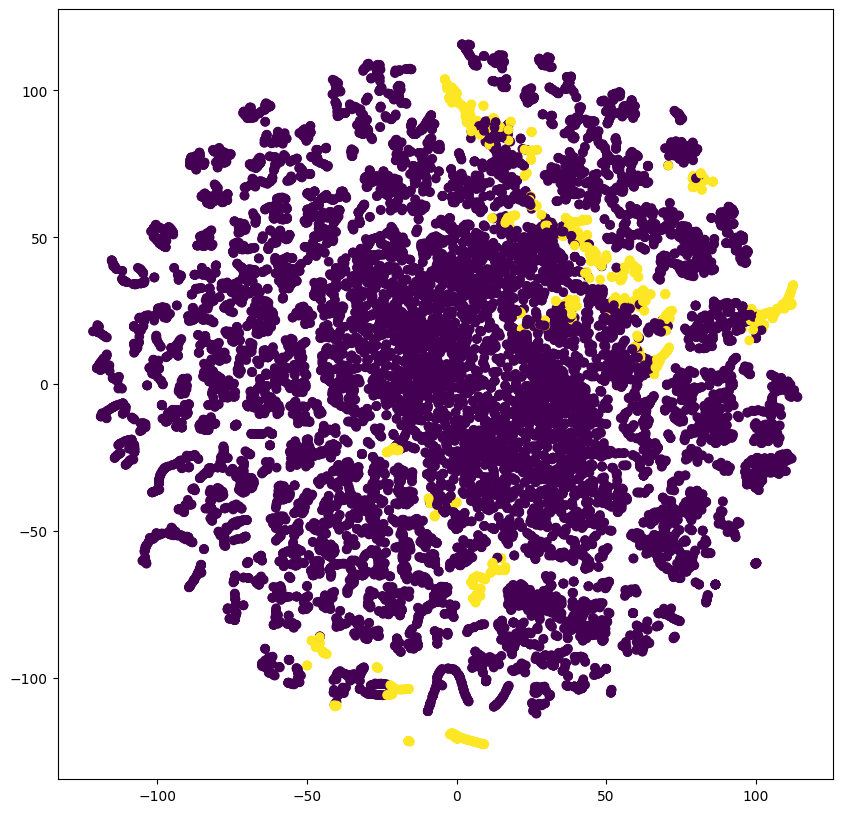

In [97]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=cityblock_outliers);

# Density-based

**DBSCAN**

Идея - аномалии должны сильно отличаться от основных данных и скорее всего попадут в "шум". Почему бы не увеличивать epsilon до тех пор, пока все "плотные" данные не окажутся в нескольких немногочисленных кластерах, а шума будет столько, сколько мы подозреваем должно быть аномалий

In [98]:
# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage > 0.1:    
    model = DBSCAN(eps=eps, n_jobs=-1).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels)) - 1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels == 1) / len(labels)    
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)
    
model = DBSCAN(eps, n_jobs=-1)
model.fit(scaled_data)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [99]:
eps

3.8499999999999943

In [100]:
anomalies_report(density_outlier)

Total number of outliers: 1697
Percentage of outliers:   9.47%


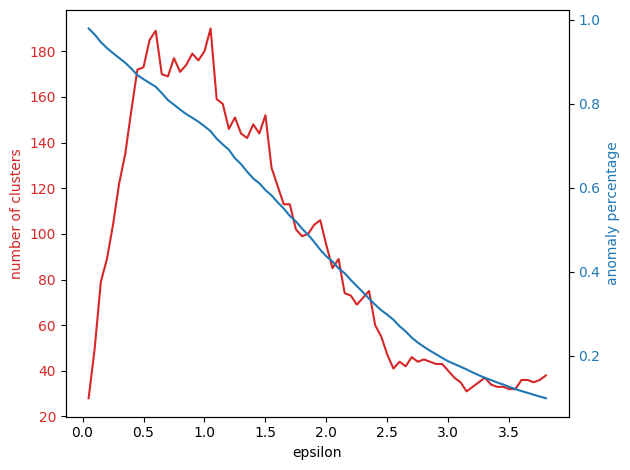

In [101]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)  
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [102]:
# labeled_data = data_features.copy()
# labeled_data['is_outlier'] = density_outlier

# sns.pairplot(data=labeled_data, vars = other_features,
#              hue='is_outlier', hue_order=[1, 0],
#              markers=['X', 'o'],  palette='bright');

# Unsupervised model-based

**One-Class SVM**

In [103]:
one_class_svm = OneClassSVM(nu=0.05, gamma='auto')
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [104]:
anomalies_report(svm_outliers)

Total number of outliers: 923
Percentage of outliers:   5.15%


In [105]:
# labeled_data = data_features.copy()
# labeled_data['is_outlier'] = svm_outliers

# sns.pairplot(data=labeled_data, vars=other_features,
#              hue='is_outlier', hue_order=[1, 0],
#              markers=['X', 'o'],  palette='bright');

**Isolation Forest**

In [106]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, 
                                   max_features=1.0, bootstrap=True, n_jobs=-1)
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [107]:
anomalies_report(isolation_outliers)

Total number of outliers: 896
Percentage of outliers:   5.00%


In [108]:
# labeled_data = data_features.copy()
# labeled_data['is_outlier'] = isolation_outliers

# sns.pairplot(data=labeled_data, vars = other_features,
#              hue='is_outlier', hue_order=[1, 0],
#              markers=['X', 'o'],  palette='bright');

# Финальное сравнение

In [109]:
summary = np.concatenate((
    [std_outliers], 
    [iqr_outliers], 
    [euclidian_outliers], 
    [cityblock_outliers],
    [density_outlier],
    [svm_outliers],
    [isolation_outliers]
))

In [110]:
summary = pd.DataFrame(
    summary.T, 
    columns=['std', 'iqr', 'euclid', 'cityblock', 'dbscan', 'svm', 'isolation']
)
summary.head()

,std,iqr,euclid,cityblock,dbscan,svm,isolation
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [111]:
summary.sum(axis=1).value_counts()

0    13648
1     2060
2      744
7      426
3      370
6      236
5      229
4      204
dtype: int64

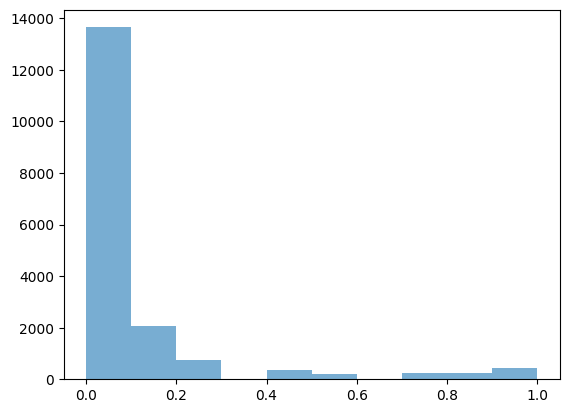

In [112]:
outlier_score = summary.mean(axis=1)
plt.hist(outlier_score, alpha=0.6);

# Оценки качества работы моделей

In [130]:
for method in summary:
    print(f'{method}\n', classification_report(data['Class'], summary[method]))
    print(f'Confusion matrix:\n\n', confusion_matrix(data['Class'], summary[method]), '\n')
    print('*' * 60)

std
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     17836
         1.0       0.04      0.95      0.07        81

    accuracy                           0.89     17917
   macro avg       0.52      0.92      0.51     17917
weighted avg       1.00      0.89      0.94     17917

Confusion matrix:

 [[15903  1933]
 [    4    77]] 

************************************************************
iqr
               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89     17836
         1.0       0.02      0.93      0.04        81

    accuracy                           0.80     17917
   macro avg       0.51      0.86      0.46     17917
weighted avg       1.00      0.80      0.88     17917

Confusion matrix:

 [[14212  3624]
 [    6    75]] 

************************************************************
euclid
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.98  

Вывод: Самые простые методы оказались и самыми неточными, boxplot и метод 3-сигм, f1-мера у них 0.80 и 0.89, соответственно. Далее по точности идёт DBSCAN, тут многое зависит от окрестности точки, епсилон - очень важный параметр, который нужно правильно настраивать. Методы, основанные на расстоянии (манхэтенская норма и норма Эвклида) показали неплохие результаты - 0.95. Такие же результаты по f1-мера показали и unsupervised модели. Мне больше понравился метод isolrtion forest за элегантный алгоритм работы